In [2]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [3]:
# load the data set
df = pd.read_csv("/content/netflix1.csv")

# **1. Data loading**

In [ ]:
# display the rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# **2. Data cleaning**
  

*   Handling missing values
*   Handle outlier
*   Handle duplicate values
*   Encode categorical feature
*   Normalization and standardisation
*   Handle imbalance dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


In [ ]:
df.shape

(8790, 13)

In [ ]:
# check for missing values

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [4]:
# check for duplicate values

df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [ ]:
df.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


<Axes: ylabel='release_year'>

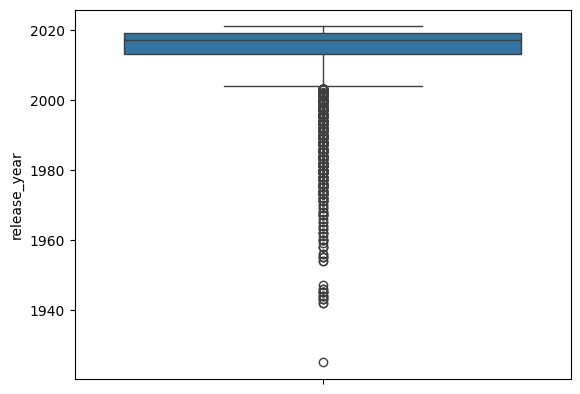

In [ ]:
# check for outlier

sns.boxplot(df['release_year'])

# as if the variable is an year so i leave it as it was

# **4. EDA**

In [5]:
# diatribution of movies

type_counts= df['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


<ipython-input-6-47918f108d36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= type_counts.index, y = type_counts.values, palette='Set2')


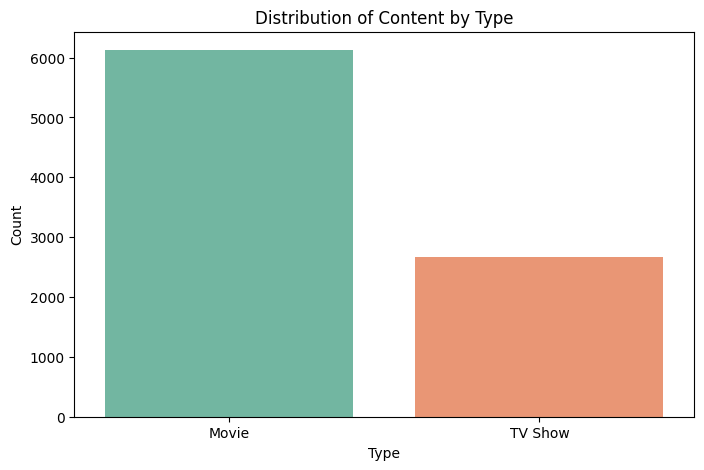

In [ ]:
# plot the diatribution

plt.figure(figsize =(8,5))
sns.barplot(x= type_counts.index, y = type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [27]:
# count the geners

# step 1: split the listed geners
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))

# Step 2: Explode the list into rows
df_exploded = df.explode('genres')

# Step 3: Count the genre occurrences
genre_counts = df_exploded['genres'].value_counts()

print(genre_counts)

genres
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                

<ipython-input-29-e645d297ba56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =genre_counts.values, y= genre_counts.index, palette='pastel')


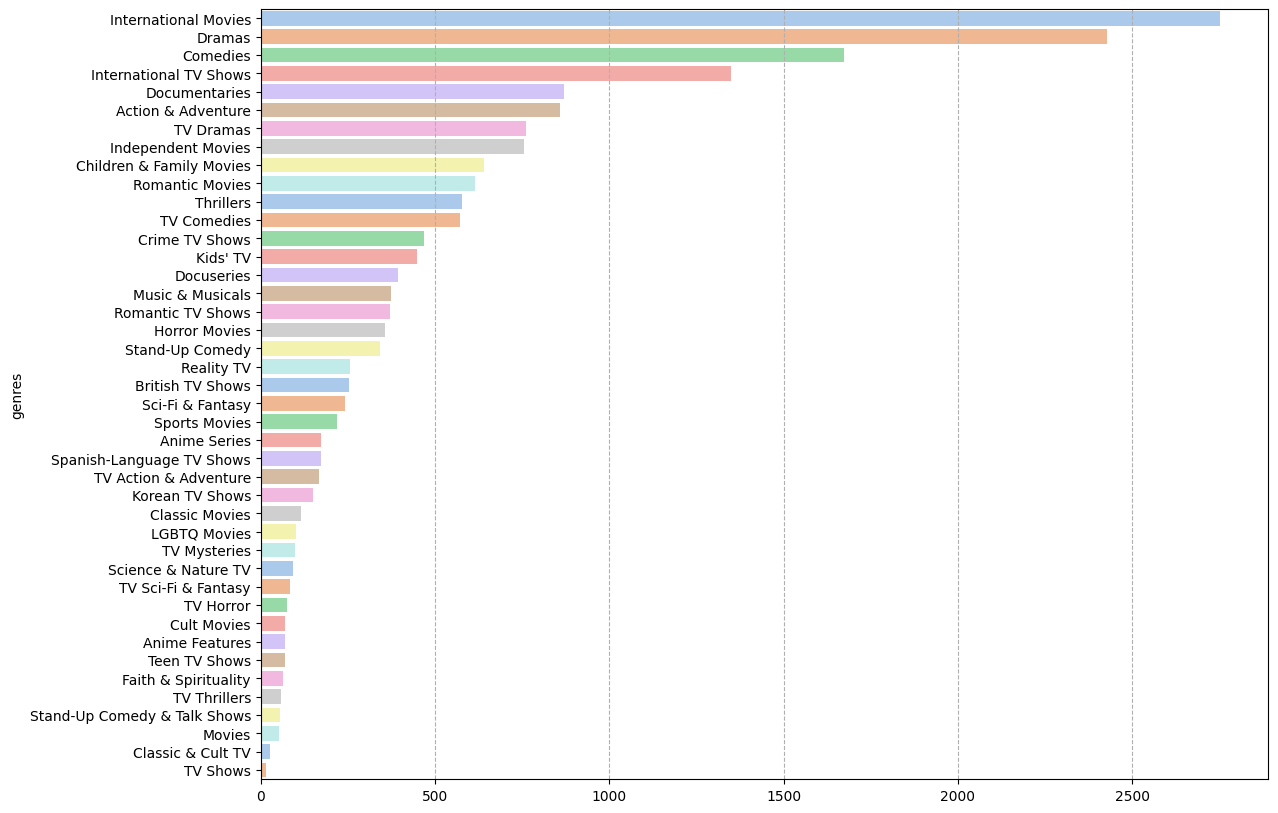

In [29]:
# plot the distribution of genre

plt.figure(figsize=(13,10))
sns.barplot(x =genre_counts.values, y= genre_counts.index, palette='pastel')
plt.grid(axis='x', linestyle='--')

<ipython-input-37-7264470e6721>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =genre_counts.values[:10], y= genre_counts.index[:10], palette='pastel')


Text(0, 0.5, 'genre')

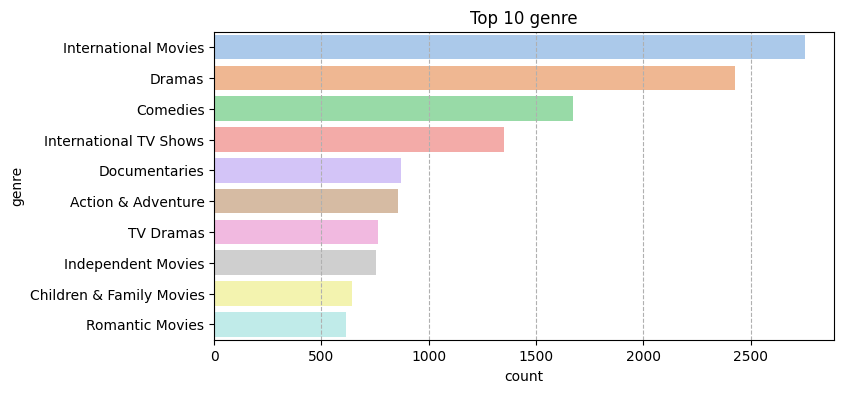

In [37]:
# Top 10 genre distribution

plt.figure(figsize=(8,4))
sns.barplot(x =genre_counts.values[:10], y= genre_counts.index[:10], palette='pastel')
plt.grid(axis='x', linestyle='--')
plt.title("Top 10 genre")
plt.xlabel("count")
plt.ylabel("genre")

<ipython-input-8-93fd18edaf90>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


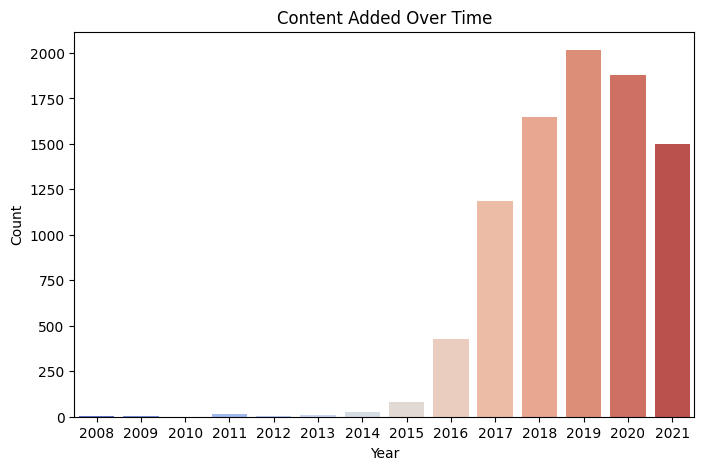

In [8]:
# content added over time

# Extract year and month from 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Plot content added over the years
plt.figure(figsize=(8, 5))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


<ipython-input-11-6d7e947c3dfa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_added', data=df, palette='coolwarm')


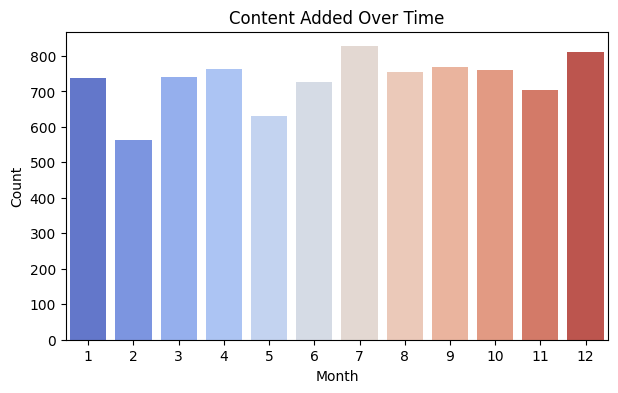

In [11]:
# Plot content added over the years
plt.figure(figsize=(7, 4))
sns.countplot(x='month_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
# Director distribution

df['director'].value_counts()

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
...,...
Mark Risley,1
Kirati Nakintanon,1
Christian De Vita,1


In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


      rating  count
0      TV-MA   3205
1      TV-14   2157
2      TV-PG    861
3          R    799
4      PG-13    490
5      TV-Y7    333
6       TV-Y    306
7         PG    287
8       TV-G    220
9         NR     79
10         G     41
11  TV-Y7-FV      6
12     NC-17      3
13        UR      3


Text(0.5, 1.0, 'distribution of rating')

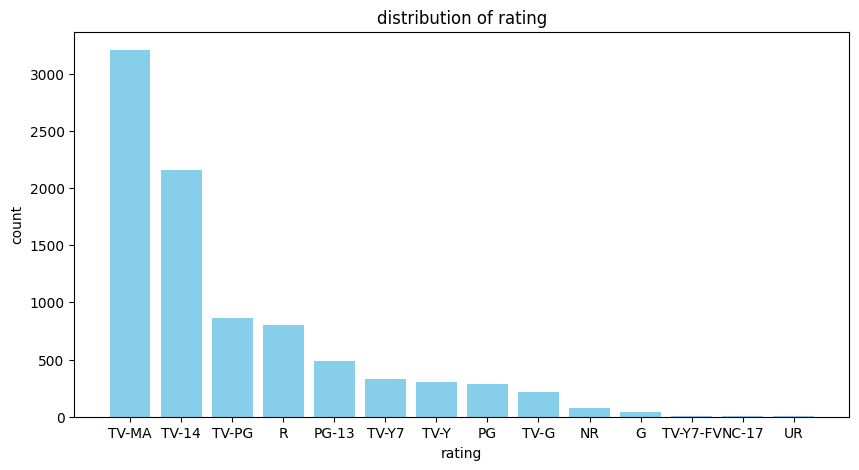

In [ ]:
# rating frequeny

ratings = df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
print(ratings)

plt.figure(figsize =(10,5))
plt.bar(ratings['rating'], ratings['count'],color='skyblue')
plt.xlabel("rating")
plt.ylabel("count")
plt.title("distribution of rating")

Text(0.5, 1.0, 'rating distribution')

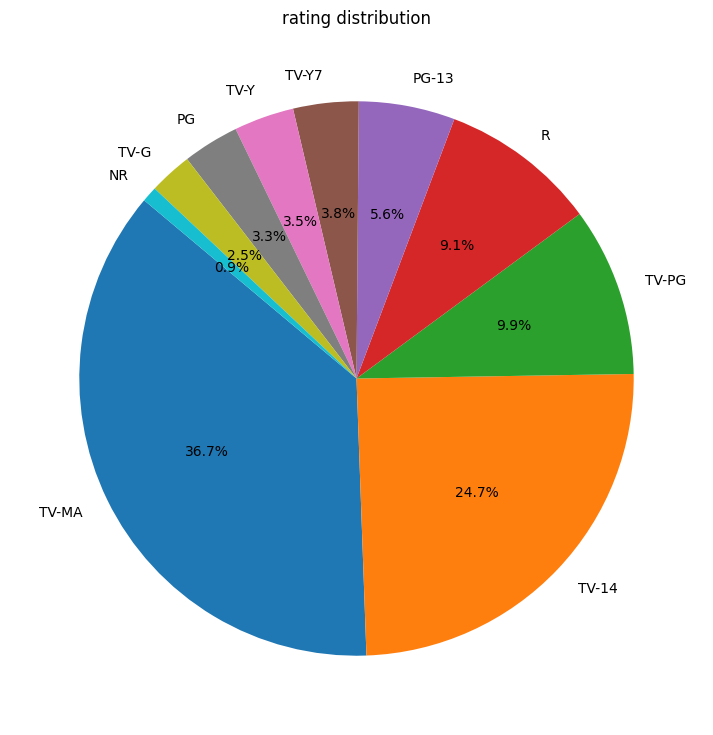

In [ ]:
# distribution using pie chart

plt.figure(figsize=(10,9))
plt.pie(ratings['count'][:10], labels= ratings['rating'][:10], autopct='%1.1f%%', startangle=140)
plt.title("rating distribution")


In [42]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,year,month,day,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,2021,9,25,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,2021,9,24,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,2021,9,24,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,2021,9,22,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,2021,9,24,"[Dramas, Independent Movies, International Mov..."


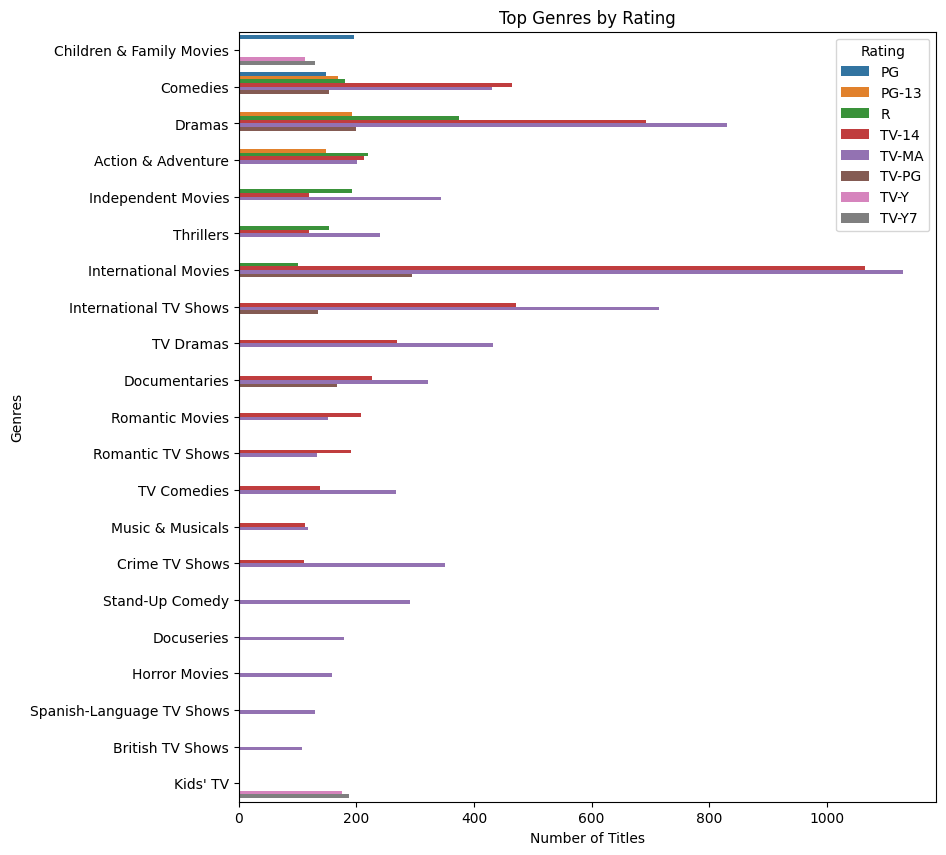

In [59]:
# genre and rating distribution

genre_rating_counts  = df_exploded.groupby('rating')['genres'].value_counts().reset_index(name='count')
top_genres = genre_rating_counts[genre_rating_counts['count'] > 100]

plt.figure(figsize=(9, 10))
sns.barplot(data=top_genres, y='genres', x='count', hue='rating')
plt.title('Top Genres by Rating')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.legend(title='Rating')

In [57]:
top_genres.value_counts()

rating  genres                     count
PG      Children & Family Movies   195      1
        Comedies                   148      1
PG-13   Action & Adventure         148      1
        Comedies                   168      1
        Dramas                     192      1
R       Action & Adventure         220      1
        Comedies                   180      1
        Dramas                     375      1
        Independent Movies         193      1
        International Movies       101      1
        Thrillers                  153      1
TV-14   Action & Adventure         213      1
        Comedies                   465      1
        Crime TV Shows             110      1
        Documentaries              227      1
        Dramas                     693      1
        Independent Movies         119      1
        International Movies       1065     1
        International TV Shows     471      1
        Music & Musicals           112      1
        Romantic Movies            208      1
        Romantic TV Shows          190      1
        TV Comedies                138      1
        TV Dramas                  269      1
        Thrillers                  119      1
TV-MA   Action & Adventure         201      1
        British TV Shows           107      1
        Comedies                   431      1
        Crime TV Shows             350      1
        Documentaries              321      1
        Docuseries                 179      1
        Dramas                     830      1
        Horror Movies              159      1
        Independent Movies         344      1
        International Movies       1130     1
        International TV Shows     714      1
        Music & Musicals           117      1
        Romantic Movies            151      1
        Romantic TV Shows          132      1
        Spanish-Language TV Shows  130      1
        Stand-Up Comedy            291      1
        TV Comedies                267      1
        TV Dramas                  433      1
        Thrillers                  240      1
TV-PG   Comedies                   153      1
        Documentaries              167      1
        Dramas                     200      1
        International Movies       294      1
        International TV Shows     134      1
TV-Y    Children & Family Movies   113      1
        Kids' TV                   175      1
TV-Y7   Children & Family Movies   129      1
        Kids' TV                   188      1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Pakistan'),
  Text(4, 0, 'Not Given'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Spain')])

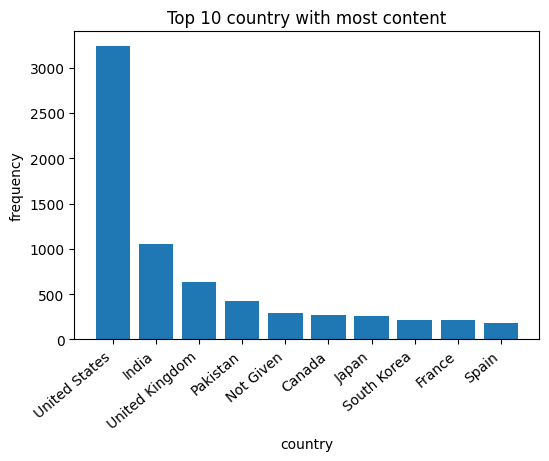

In [25]:
# Top 10 countries with most content on Netflix

top_ten = df['country'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[:10]

plt.figure(figsize =(6,4))
plt.bar(top_ten['country'], top_ten['count'])
plt.xlabel("country")
plt.ylabel("frequency")
plt.title("Top 10 country with most content")
plt.xticks( rotation=40,ha='right')

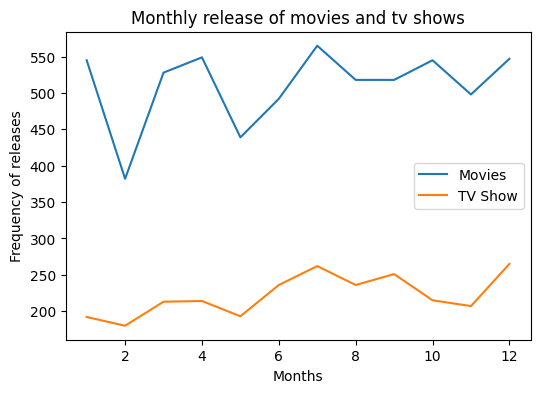

In [63]:
# Monthly releases of Movies and TV shows on Netflix

df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

monthly_movie_release = df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release = df[df['type']=='TV Show']['month'].value_counts().sort_index()

plt.figure(figsize =(6,4))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label ='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label ='TV Show')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.title("Monthly release of movies and tv shows")
plt.legend()

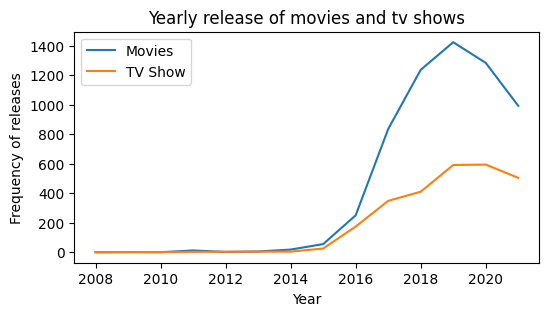

In [67]:
# Yearly releases of Movies and TV shows on Netflix

yearly_movie_release = df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_release = df[df['type']=='TV Show']['year'].value_counts().sort_index()

plt.figure(figsize =(6,3))
plt.plot(yearly_movie_release.index, yearly_movie_release.values, label ='Movies')
plt.plot(yearly_series_release.index, yearly_series_release.values, label ='TV Show')
plt.xlabel("Year")
plt.ylabel("Frequency of releases")
plt.title("Yearly release of movies and tv shows")
plt.legend()